In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator,img_to_array

In [ ]:
imgData = load_img( './tigerlion/lion1.jpg')
imgData

FileNotFoundError: [Errno 2] No such file or directory: 'tigerlion/lion1.jpg'

In [3]:
dataGen= ImageDataGenerator( rescale=1./255)
# trainGen = dataGen.flow_from_directory( './image' , target_size=(98,98) ,batch_size=32)
trainGen = dataGen.flow_from_directory( './tigerlion' , target_size=(98,98))

Found 20 images belonging to 2 classes.


In [20]:
x_train, y_train = next( trainGen )

In [21]:
x_train.shape

(20, 98, 98, 3)

In [22]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [4]:
trainGen.class_indices

{'lion': 0, 'tiger': 1}

In [5]:
model = Sequential()
model.add( Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(98,98,3),
                  activation='relu', padding='same' ) )
model.add( Conv2D(16, kernel_size=(3,3), activation='relu') )
model.add( MaxPool2D(pool_size=(2,2) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=2, activation='softmax'))
model.compile( loss='categorical_crossentropy', 
              optimizer=Adam(0.01) ,metrics=['acc'])
model.fit( trainGen ,epochs=200)

c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc: 0.5000 - loss: 0.6843
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - acc: 0.5000 - loss: 26.5287
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - acc: 0.5000 - loss: 10.9037
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - acc: 0.9000 - loss: 0.4194
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - acc: 0.9500 - loss: 0.4984
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - acc: 0.5500 - loss: 0.9109
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - acc: 0.5000 - loss: 0.6899
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - acc: 0.9500 - loss: 0.3787
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - acc: 0.7500 - loss: 0.4493
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - acc: 0.9500 - loss: 0.1952
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - acc: 0.9500 - loss: 0.2409
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - acc: 0.9000 - loss: 0.2679
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/ste

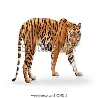

In [37]:
testImg = load_img( 'tigertest.jpg', target_size=(98,98))
testImg

In [38]:
imgArr = img_to_array( testImg )/255
imgArr.shape

(98, 98, 3)

In [39]:
model.predict( imgArr.reshape(1,98,98,3) ).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([1])

In [6]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator,img_to_array

In [7]:
modelVgg = vgg16.VGG16( include_top=False, input_shape=(98,98,3) )
modelVgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 98, 98, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 98, 98, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 49, 49, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
len( modelVgg.layers )

19

0 기존특징추축기 값은 학습된 w
1. all False: 학습X 특징추출기만 학습
2. 상위레이어일부만: 추가학습
3. all True: 학습된 w 에 all 추가학습: 기존 1000개 이미지와 다른 경우

In [9]:
for layer in modelVgg.layers[:-5]:
    layer.trainable = False
for layer in modelVgg.layers[5:]:
    layer.trainable = True

In [ ]:
model = Sequential()
model.add( modelVgg )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu') )
model.add( Dense(units=2, activation='softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit( trainGen, epochs=10)